## Position - Salary Dataset

#### This script demonstrates salary prediction using both linear and polynomial regression.

In [1]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

#### Load the dataset from a URL

In [2]:

url = "https://raw.githubusercontent.com/content-anu/dataset-polynomial-regression/master/Position_Salaries.csv"
df = pd.read_csv(url, index_col=0)  # Read CSV and set the first column as the index
df.head(10)  # Display the first 10 rows of the dataset

,Level,Salary
Position,,
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


#### Extract feature (X) and target variable (y)

In [3]:

X = df.Level.values  # Extract 'Level' column as input feature
y = df.Salary.values  # Extract 'Salary' column as target variable
X.shape, y.shape  # Print the shapes of X and y

((10,), (10,))

#### Reshape X and y to make them suitable for model training

In [4]:

X = X.reshape(-1, 1)  # Reshape X to a 2D array
y = y.reshape(-1, 1)  # Reshape y to a 2D array
X.shape, y.shape  # Print the new shapes of X and y

((10, 1), (10, 1))

In [5]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # Fit the model to the dataset
y_pred = lin_reg.predict(X)  # Predict salary using the linear model

#### Visualize the linear regression results

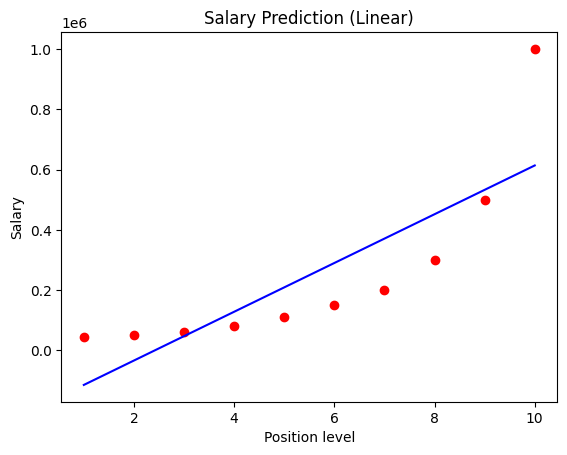

In [6]:
plt.scatter(X, y, color='red')  # Scatter plot of actual data points
plt.plot(X, y_pred, color='blue')  # Line plot of predicted salaries
plt.title("Salary Prediction (Linear)")  # Title of the plot
plt.xlabel('Position level')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.show()  # Display the plot

In [7]:
from sklearn.metrics import r2_score # Import R-squared metric
# Calculate R-squared score for linear regression model
print("R2 score:", r2_score(y, y_pred))

R2 score: 0.6690412331929895


In [8]:
from sklearn.preprocessing import PolynomialFeatures  # Import PolynomialFeatures

# Transform input features to include polynomial terms (degree 3)
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)  # Convert X into polynomial features

In [9]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [10]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [11]:
X.shape

(10, 1)

In [12]:
X_poly.shape

(10, 4)

#### Train a Polynomial Regression model

In [13]:

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)  # Fit the model using polynomial features
y_pred1 = lin_reg2.predict(X_poly)  # Predict salary using polynomial regression

#### Visualize the polynomial regression results

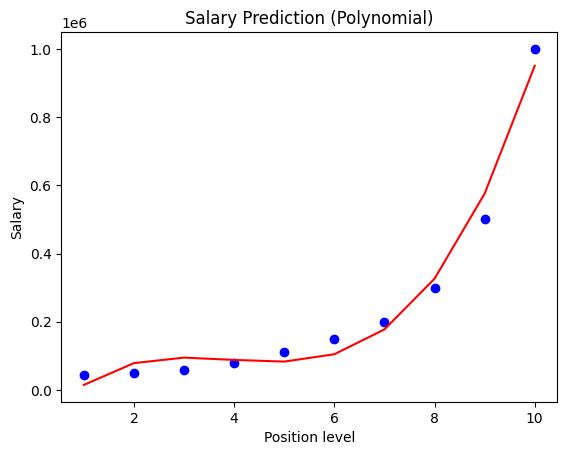

In [14]:

plt.scatter(X, y, color='blue')  # Scatter plot of actual data points
plt.plot(X, y_pred1, color='red')  # Line plot of predicted salaries (polynomial model)
plt.title("Salary Prediction (Polynomial)")  # Title of the plot
plt.xlabel('Position level')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.show()  # Display the plot

In [15]:
# Calculate R-squared score for polynomial regression model
print("R2 score:", r2_score(y, y_pred1))

R2 score: 0.9812097727913366


In [16]:
# Predict salary for level 6.5 using Linear Regression
lin_reg.predict([[6.5]])

array([[330378.78787879]])

In [17]:
# Predict salary for level 6.5 using Polynomial Regression
lin_reg2.predict(poly_reg.transform([[6.5]]))

array([[133259.46969697]])